(100, 100)
(100, 100)


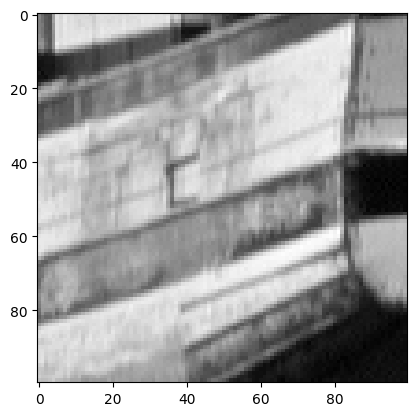

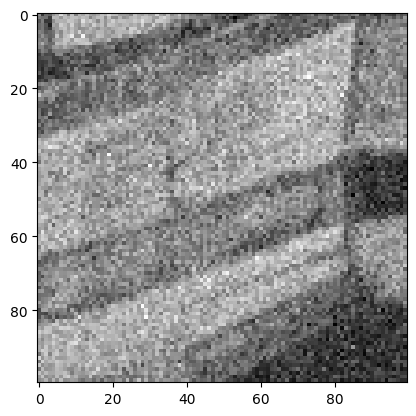

In [7]:
# Alex Domagala
# ECE 6560

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('../images/boats.bmp')
img = np.array(img)
img = img[300:400,300:400]
print(img.shape)
noise = 30*np.random.randn(img.shape[0],img.shape[1]) # standard normal distribution


# #salt and pepper noise
# for i in range(img.shape[0]):
#   for j in range(img.shape[1]):
#     if (np.random.randint(0, 100) == 3):
#       img[i][j] = 1


print(noise.shape)
plt.imshow(img,cmap='gray')
plt.show()
img = img + noise
plt.imshow(img, cmap='gray')
plt.show()

In [2]:
# partial derivatives

def Ix(I,i,j):
  return (I[i-1,j] - I[i+1,j]) / 2

def Iy(I,i,j):
  return (I[i,j-1] - I[i,j+1]) / 2

def Ixx(I,i,j):
  return (I[i-1,j] - 2*I[i,j] + I[i+1,j])

def Iyy(I,i,j):
  return (I[i,j-1] - 2*I[i,j] + I[i,j-1])

def Ixy(I,i,j):
  #return (I[i+1,j-1] - I[i,j-1] - I[i-1,j+1] + I[i-1,j])
  return (I[i+1,j+1] - I[i-1,j+1] - I[i+1,j-1] + I[i-1,j-1])/4

In [5]:
# intermediate functions
E = .5

def gradient(Ix_i,Iy_i,power):
  Ix_squared = np.power(Ix_i,2)
  Iy_squared = np.power(Iy_i,2)
  return np.power( Ix_squared + Iy_squared + (E**2), power )

def e_sigma(a,Ix_i,Iy_i,c):
  gradient_i = gradient(Ix_i,Iy_i,-.5)
  return np.exp( (-1/a) * (gradient_i - c) )

def dDx_LIx(k,a,c,Ix_i,Iy_i,Ixx_i,Ixy_i):
  return (k/a) * ( Ixx_i*gradient(Ix_i,Iy_i,-.5) - Ix_i*gradient(Ix_i,Iy_i,-1.5) * (Ix_i*Ixx_i + Iy_i*Ixy_i) * (e_sigma(a,Ix_i,Iy_i,c)/ ((1+e_sigma(a,Ix_i,Iy_i,c))**2)) +
                   Ix_i*gradient(Ix_i,Iy_i,-.5) * (-1/a) * e_sigma(a,Ix_i,Iy_i,c) * gradient(Ix_i,Iy_i,-.5) * (Ix_i*Ixx_i + Iy_i*Ixy_i) * ( (1/(1+e_sigma(a,Ix_i,Iy_i,c))**2) + e_sigma(a,Ix_i,Iy_i,c) * (-2) * ((1+e_sigma(a,Ix_i,Iy_i,c))**-3) ))

def dDy_LIy(k,a,c,Ix_i,Iy_i,Iyy_i,Ixy_i):
  return (k/a) * ( Iyy_i*gradient(Ix_i,Iy_i,-.5) - Iy_i*gradient(Ix_i,Iy_i,-1.5) * (Ix_i*Ixy_i + Iy_i*Iyy_i) * (e_sigma(a,Ix_i,Iy_i,c)/ ((1+e_sigma(a,Ix_i,Iy_i,c))**2)) +
                   Iy_i*gradient(Ix_i,Iy_i,-.5) * (-1/a) * e_sigma(a,Ix_i,Iy_i,c) * gradient(Ix_i,Iy_i,-.5) * (Ix_i*Ixy_i + Iy_i*Iyy_i) * ( (1/(1+e_sigma(a,Ix_i,Iy_i,c))**2) + e_sigma(a,Ix_i,Iy_i,c) * (-2) * ((1+e_sigma(a,Ix_i,Iy_i,c))**-3) ))


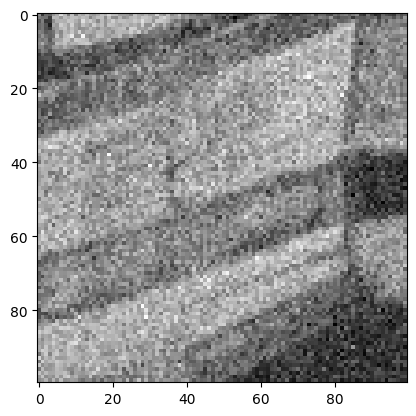

0


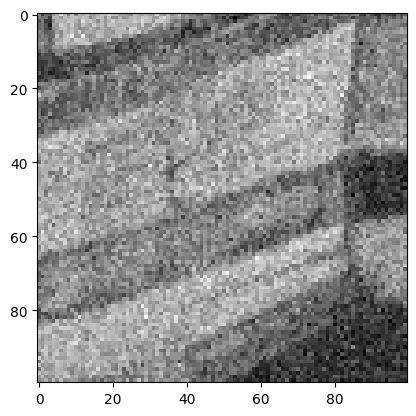

5


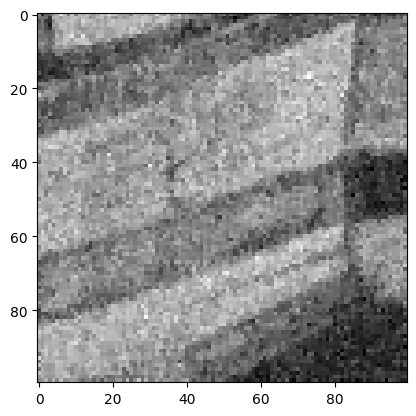

10


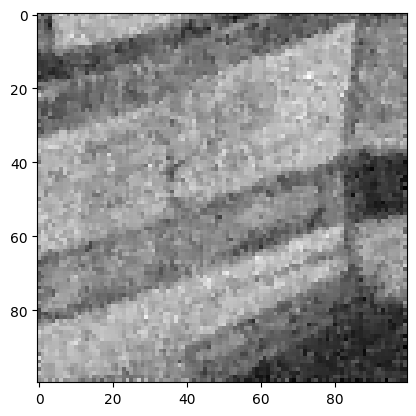

15


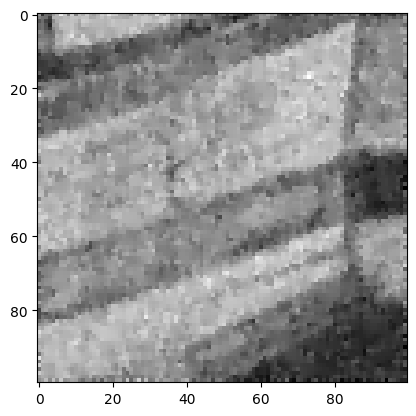

20


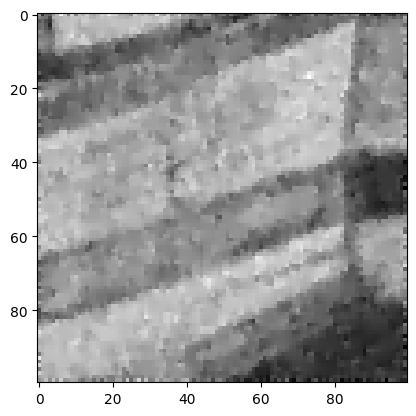

25


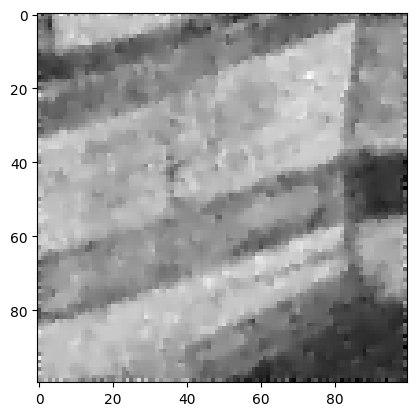

30


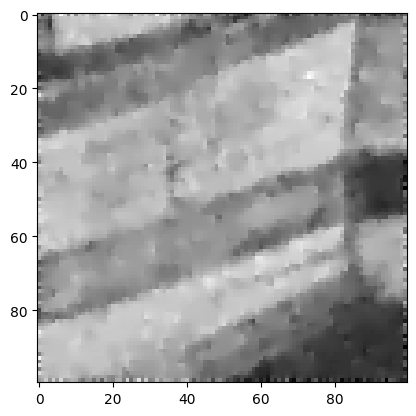

35


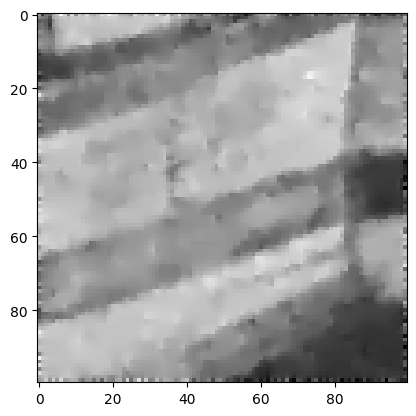

40


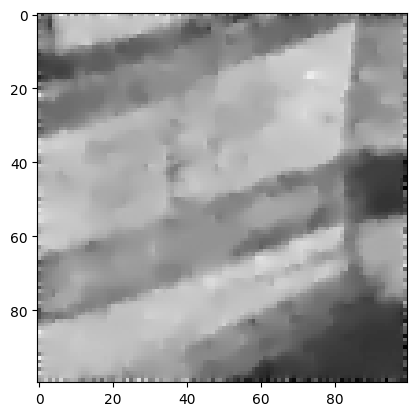

45


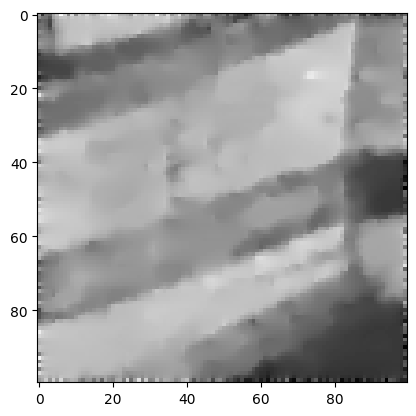

50


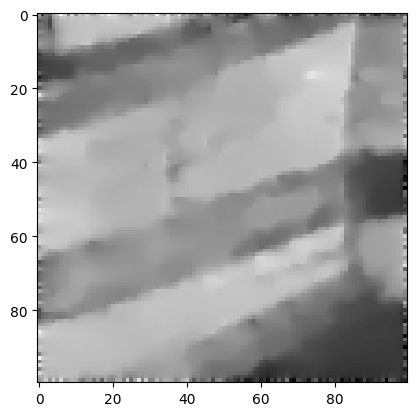

55


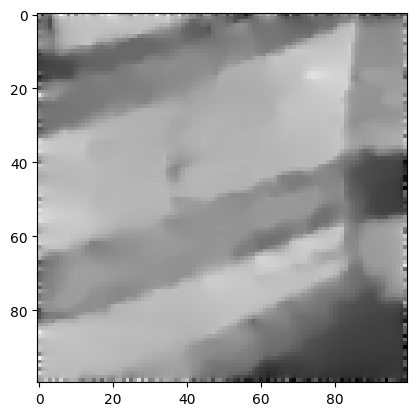

60


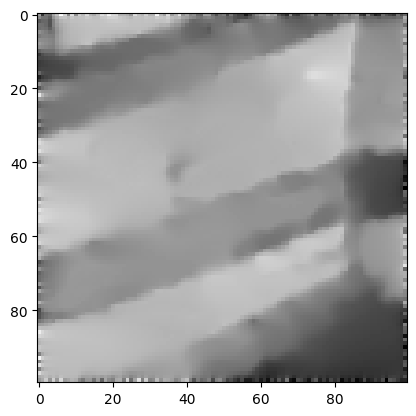

65


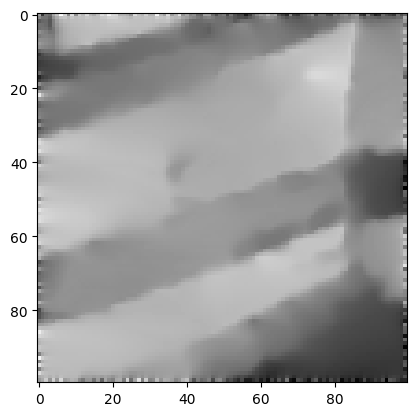

70


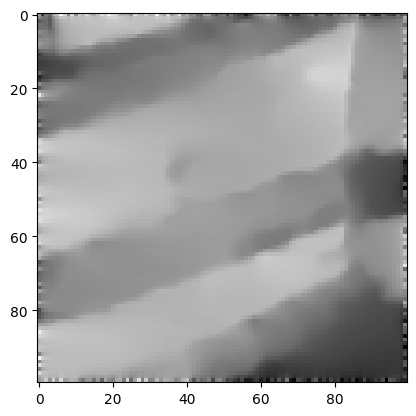

75


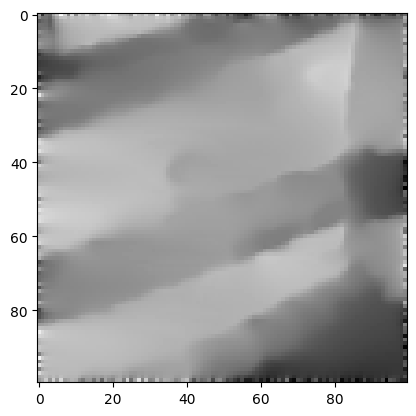

80


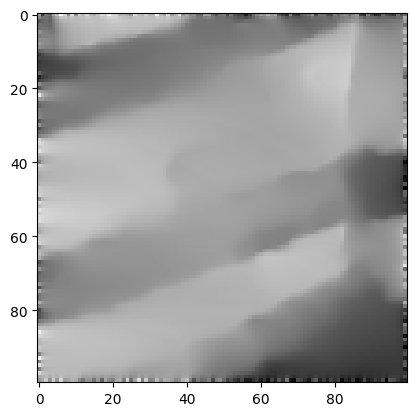

85


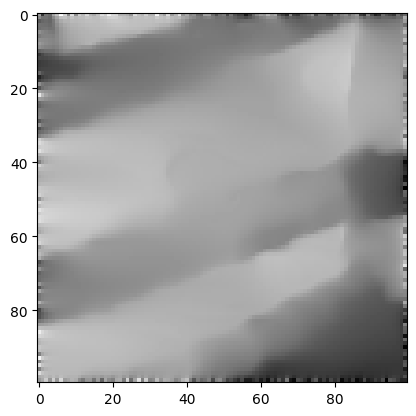

90


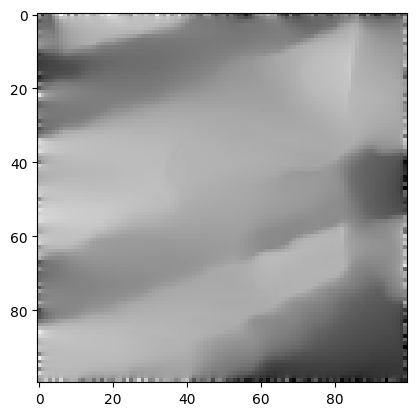

95


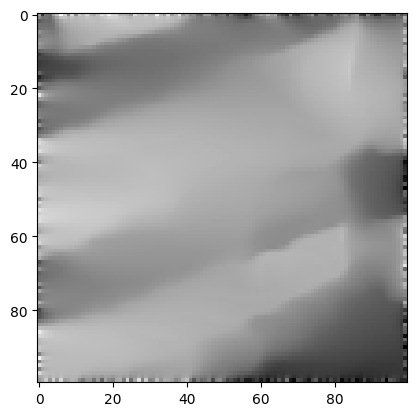

KeyboardInterrupt: 

In [8]:
a = 500
c = 240
k = 1600
I = img
timestep = .1
plt.imshow(I,cmap='gray')
plt.show()

# iterate through all the pixels in the image
for iter in range(150):
  for i in range(1,I.shape[0]-1):
    for j in range(1,I.shape[1]-1):

      # compute partial derivatives
      Ix_val  = Ix(I,i,j)
      Iy_val  = Iy(I,i,j)
      Ixx_val = Ixx(I,i,j)
      Iyy_val = Iyy(I,i,j)
      Ixy_val = Ixy(I,i,j)

      # compute update
      I[i,j] = I[i,j] + timestep * (dDx_LIx(k,a,c,Ix_val,Iy_val,Ixx_val,Ixy_val) + 
                                    dDy_LIy(k,a,c,Ix_val,Iy_val,Iyy_val,Ixy_val))

  if (iter % 5 == 0):
    print(iter)
    plt.imshow(I,cmap='gray')
    plt.show()